In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sympy import Point,Line

In [2]:
data = pd.read_csv('~/DataSet4/BLE_RSSI_dataset/iBeacon_RSSI_Labeled.csv')

In [3]:
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [4]:
true_labels= data.iloc[:,0:1]
data=data.iloc[:,2:]
data.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


**Replacing -200 with 0 because it signifies not found**

In [5]:
data=data.replace(-200,0)
data.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0,0,0,0,0,-78,0,0,0,0,0,0,0
1,0,0,0,0,0,-78,0,0,0,0,0,0,0
2,0,0,0,0,0,-77,0,0,0,0,0,0,0
3,0,0,0,0,0,-77,0,0,0,0,0,0,0
4,0,0,0,0,0,-77,0,0,0,0,0,0,0


In [6]:
#scaler = StandardScaler()
#data = scaler.fit_transform(data)
#scaler.mean_
#pca = PCA(n_components=3)
#sample=pca.fit_transform(data)
#pca.explained_variance_ratio_
#sample
#data=np.array(data)
sample=data

In [7]:
distortion_euclidean=[]
slope=[]
change=[]
K = range(1,120)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        change.append([s])
        slope.append([k,s])

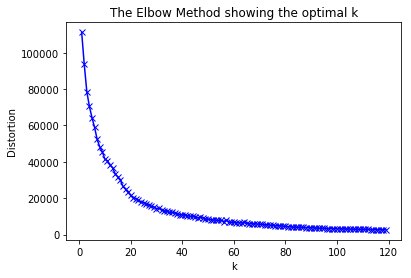

In [9]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
distances=[]
for i in range(1,119):
    p1=Point(1,distortion_euclidean[0])
    p2=Point(120,distortion_euclidean[118])
    l1 = Line(p1,p2)
    p=Point(i+1,distortion_euclidean[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+1))

Optimal number 0f clusters = 20


In [97]:
slope

[[2, -20899.683122452872],
 [3, -16592.15217478352],
 [4, -6805.759164465933],
 [5, -6053.3100696971815],
 [6, -3718.072114558665],
 [7, -5525.844609753174],
 [8, -4576.089576494258],
 [9, -3815.726175142285],
 [10, -1093.563708237216],
 [11, -2317.7211676215557],
 [12, -2288.412711901692],
 [13, -1389.5296575988232],
 [14, -1746.2077414912765],
 [15, -587.6382236483496],
 [16, -384.47377064708235],
 [17, -286.70488978418416],
 [18, -249.04888769694935],
 [19, -284.1045968501767],
 [20, -188.45995152875093],
 [21, -160.0831268522643],
 [22, -355.72244000585215],
 [23, -495.97234180779105],
 [24, -205.47079375968042],
 [25, -255.5387313004503],
 [26, -95.58275843067895],
 [27, -331.39088147510574],
 [28, -404.5404237100129],
 [29, -121.57194580844225],
 [30, -69.14550046218937],
 [31, -33.82458132319425],
 [32, -134.30207252431683],
 [33, -192.94579766775587],
 [34, -81.59780719522405],
 [35, -49.38196055180606],
 [36, -64.85423986617889],
 [37, -165.51125710668111],
 [38, -148.42686918

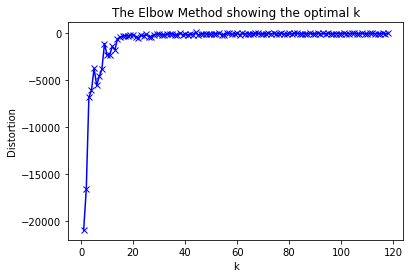

In [98]:
plt.plot(range(1,119),change,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [99]:
#chose the value after which there is a reduction in gain(rather loss)
c=[]
for a in range(0,117):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    c.append([change_slope])
    if change_slope > 0:
        
        #print('change in slope ='+str(change_slope))
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 5
Optimal Number of Clusters = 9
Optimal Number of Clusters = 12
Optimal Number of Clusters = 17
Optimal Number of Clusters = 20
Optimal Number of Clusters = 21
Optimal Number of Clusters = 23
Optimal Number of Clusters = 25
Optimal Number of Clusters = 26
Optimal Number of Clusters = 30
Optimal Number of Clusters = 31
Optimal Number of Clusters = 34
Optimal Number of Clusters = 35
Optimal Number of Clusters = 38
Optimal Number of Clusters = 40
Optimal Number of Clusters = 42
Optimal Number of Clusters = 44
Optimal Number of Clusters = 46
Optimal Number of Clusters = 48
Optimal Number of Clusters = 51
Optimal Number of Clusters = 53
Optimal Number of Clusters = 54
Optimal Number of Clusters = 56
Optimal Number of Clusters = 57
Optimal Number of Clusters = 60
Optimal Number of Clusters = 62
Optimal Number of Clusters = 64
Optimal Number of Clusters = 65
Optimal Number of Clusters = 67
Optimal Number of Clusters = 68
Optimal Number of Clusters = 70
Optimal Nu

In [101]:
print(c)
#c.size

[[-4307.530947669351], [-9786.393010317588], [-752.4490947687518], [-2335.2379551385166], [1807.7724951945092], [-949.7550332589162], [-760.3634013519732], [-2722.162466905069], [1224.1574593843397], [-29.30845571986356], [-898.8830543028689], [356.6780838924533], [-1158.5695178429269], [-203.16445300126725], [-97.76888086289819], [-37.65600208723481], [35.055709153227326], [-95.64464532142574], [-28.37682467648665], [195.63931315358786], [140.2499018019389], [-290.50154804811064], [50.06793754076989], [-159.95597286977136], [235.8081230444268], [73.14954223490713], [-282.9684779015706], [-52.426445346252876], [-35.32091913899512], [100.47749120112258], [58.64372514343904], [-111.34799047253182], [-32.21584664341799], [15.472279314372827], [100.65701724050223], [-17.084387919390792], [-172.3818655980881], [174.0240252800004], [-121.46420400717261], [162.34337630082882], [-129.13812610123978], [71.19009431673021], [-257.36830113488304], [337.82498261517594], [-188.9331073731605], [28.02

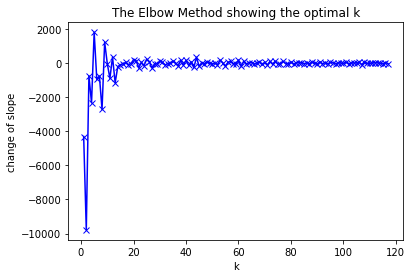

In [102]:
plt.plot(range(1,118),c,'bx-')
plt.xlabel('k')
plt.ylabel('change of slope')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [103]:
c_c=[]
c=np.array(c)
for a in range(0,116):
    change_change_slope=(c[a] - c[a+1])
    if change_change_slope > 0:
        c_c.append(change_change_slope[0])
c_c_n=[]
for a in range(0,len(c_c)):
    crs=c_c[a]/max(c_c)
    if crs > 0 and crs >0.05:
        c_c_n.append(crs)

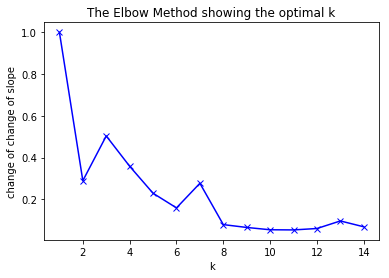

In [105]:
plt.plot(range(1,15),c_c_n,'bx-')
plt.xlabel('k')
plt.ylabel('change of change of slope')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
np.unique(true_labels)

array(['D13', 'D14', 'D15', 'E15', 'F08', 'G15', 'I01', 'I02', 'I03',
       'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I15', 'J01',
       'J02', 'J03', 'J04', 'J05', 'J06', 'J07', 'J08', 'J10', 'J15',
       'K01', 'K02', 'K03', 'K04', 'K05', 'K06', 'K07', 'K08', 'L01',
       'L02', 'L03', 'L04', 'L05', 'L06', 'L08', 'L09', 'L15', 'M01',
       'M02', 'M03', 'M04', 'M05', 'M06', 'N01', 'N02', 'N03', 'N04',
       'N05', 'N06', 'N15', 'O01', 'O02', 'O03', 'O04', 'O05', 'O06',
       'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P15', 'Q01', 'Q02',
       'Q03', 'Q04', 'Q05', 'Q06', 'R01', 'R02', 'R03', 'R04', 'R05',
       'R06', 'R15', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S15', 'T01', 'T03', 'T04', 'T05', 'T15', 'U01', 'U02',
       'U03', 'U04', 'U05', 'U15', 'V15', 'W15'], dtype=object)

In [12]:
kmeansModel_new = KMeans(n_clusters=6)
labels=kmeansModel_new.fit_predict(data)

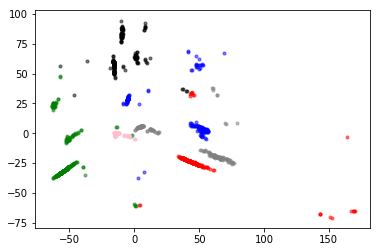

In [16]:
area = np.pi*3
plt.scatter(sample[labels==0,0],sample[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(sample[labels==1,0],sample[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(sample[labels==2,0],sample[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(sample[labels==3,0],sample[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(sample[labels==4,0],sample[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(sample[labels==5,0],sample[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()